In [8]:
%run data_formatting.ipynb
import numpy as np

In [3]:
# Print the counts
print("number of tags: ", len(set([item for sublist in df.tags for item in sublist])))

number of tags:  2042


In [4]:
#Print the variables of the dataset
print("dataset variables: ", df.columns.tolist())

dataset variables:  ['name', 'transcript', 'locations', 'biography', 'interview_date', 'interview_locations', 'collections', 'subjects', 'tags']


In [5]:
df.head()

,name,transcript,locations,biography,interview_date,interview_locations,collections,subjects,tags
0,Inge-Juliana Sackmann Christy,"Cindy Kelly: This is Wednesday, March 20. Inge...",[Los Alamos],Inge-Juliana Sackmann Christy is a physicist a...,"March 20, 2019",[Pasadena],[Atomic Heritage Foundation],"[European Refugees, German Atomic Bomb Program...","[Beatrice Tinsley, Caltech, Carl Friedrich Von..."
1,Tom Foulds,"Trisha Pritikin: Okay. It is January 15th, 20...",[Hanford],Tom Foulds is an attorney who represented plai...,"January 15, 2019",[Lynnwood],[Atomic Heritage Foundation],"[Environmental Impact, Health Issues, Safety]","[Cancer, Cold War, Department of Energy, Downw..."
2,Richard Eymann,Karen Dorn Steele: Our second interview is wit...,[Hanford],Richard Eymann is a founding partner and lead ...,"April 29, 2019",[Spokane],[Atomic Heritage Foundation],"[Cold War, Environmental Impact, Health Issues...","[Columbia River, Department of Energy, Downwin..."
3,Bob Cook,"Karen Dorn Steele: It’s April 29, 2019. Our fi...",[Hanford],Bob Cook is a nuclear engineer. In this interv...,"April 29, 2019",[Hanford],[Atomic Heritage Foundation],"[Environmental Impact, Health Issues, Native A...","[American Indian, Basalt Waste Isolation Proje..."
4,George Warren Reed,[The Atomic Heritage Foundation is very gratef...,[Chicago Met Lab],George Warren Reed (1920-2015) was a chemist a...,"November 11, 2006",[Chicago],[Atomic Heritage Foundation],"[African-Americans, Civilian Life]",[“Our Man in Havana.” National Resource Counci...


In [5]:
# Use explode() to create a new DataFrame with one row for each city
location_df = df.explode('locations')

# Use value_counts() to count the frequency of each city
counts = location_df['locations'].value_counts()
print(counts)

locations
Los Alamos                            202
Oak Ridge                             151
Hanford                               149
Chicago Met Lab                       108
Trinity Site                           62
Santa Fe                               59
University of California               53
Washington                             42
Manhattan                              40
Y-12 Plant                             36
B Reactor/100 Area                     35
K-25 Plant                             34
Tinian Island                          30
Columbia University                    27
Wendover Air Field                     21
Princeton University                   19
Marshall Islands                       18
Cambridge                              17
X-10 Graphite Reactor                  16
Hiroshima Mission                      14
Wilmington                             13
Jackson Square                         11
T-Plant/200 Areas                      11
Nagasaki Mission        

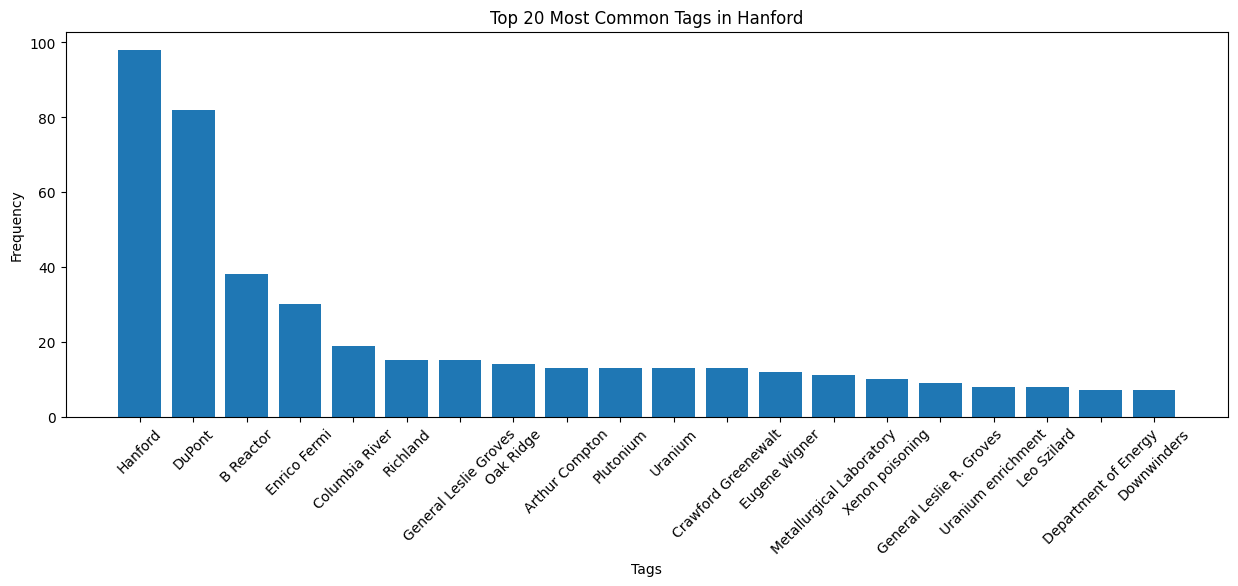

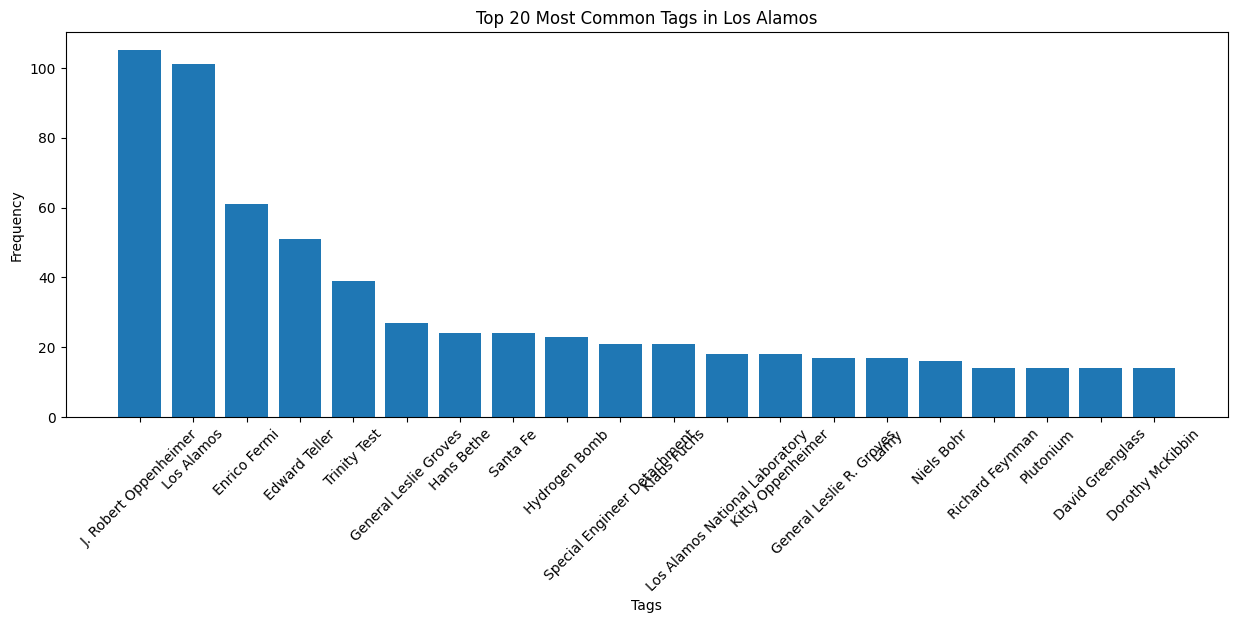

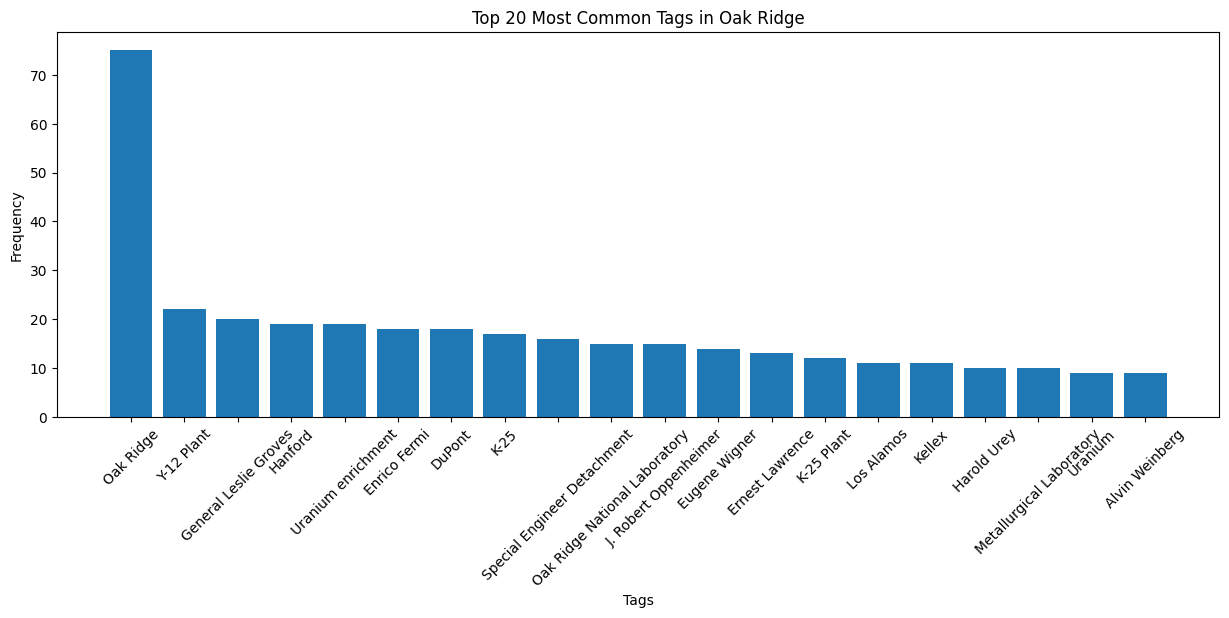

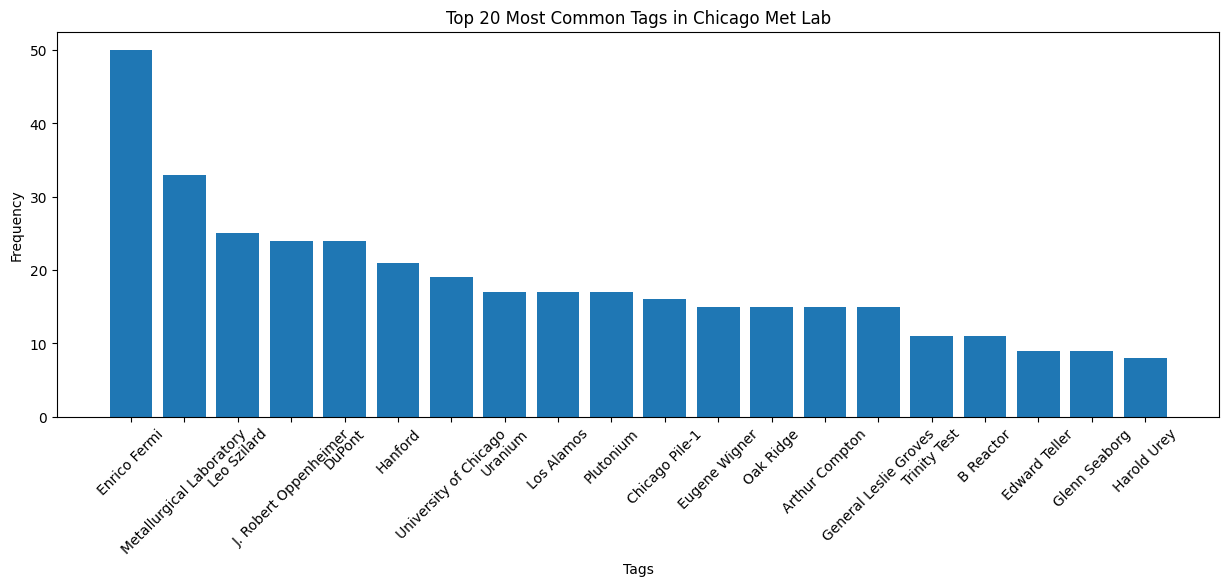

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

# Initialize a dictionary to store tags for each location
location_tags = {}

# Iterate through the DataFrame and accumulate tags for each location
for _, row in df.iterrows():
    for location in row["locations"]:
        if location not in location_tags:
            location_tags[location] = []
        location_tags[location].extend(row["tags"])

def plot_most_common_X(category1, category2, n):
    count = Counter(category2).most_common(n)
    category2, frequencies = zip(*count)

    fig, ax = plt.subplots(figsize=(15, 5))
    plt.bar(category2, frequencies)
    plt.xlabel("Tags")
    plt.ylabel("Frequency")
    plt.title(f"Top {n} Most Common Tags in {category1}")
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.show()

# Create a bar plot for each location showing the frequencies of the 5 most common tags
#for location, tags in location_tags.items():
    #plot_most_common_tags(location, tags, n=5)

plot_most_common_X("Hanford", location_tags["Hanford"], n=20)
plot_most_common_X("Los Alamos", location_tags["Los Alamos"], n=20)
plot_most_common_X("Oak Ridge", location_tags["Oak Ridge"], n=20)
plot_most_common_X("Chicago Met Lab", location_tags["Chicago Met Lab"], n=20)

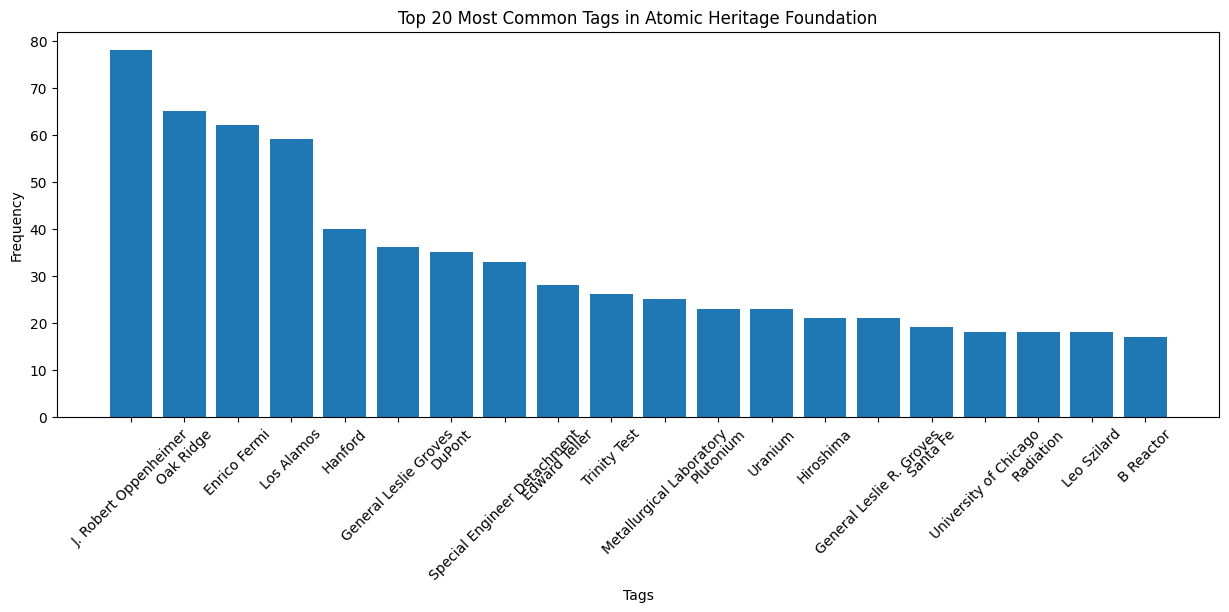

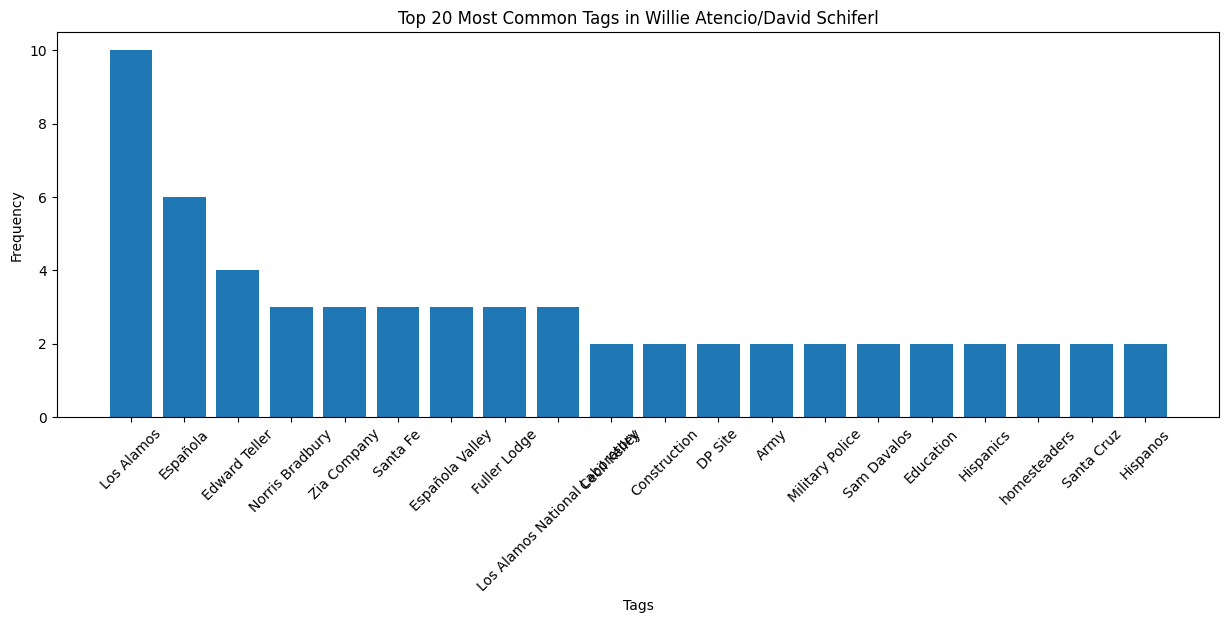

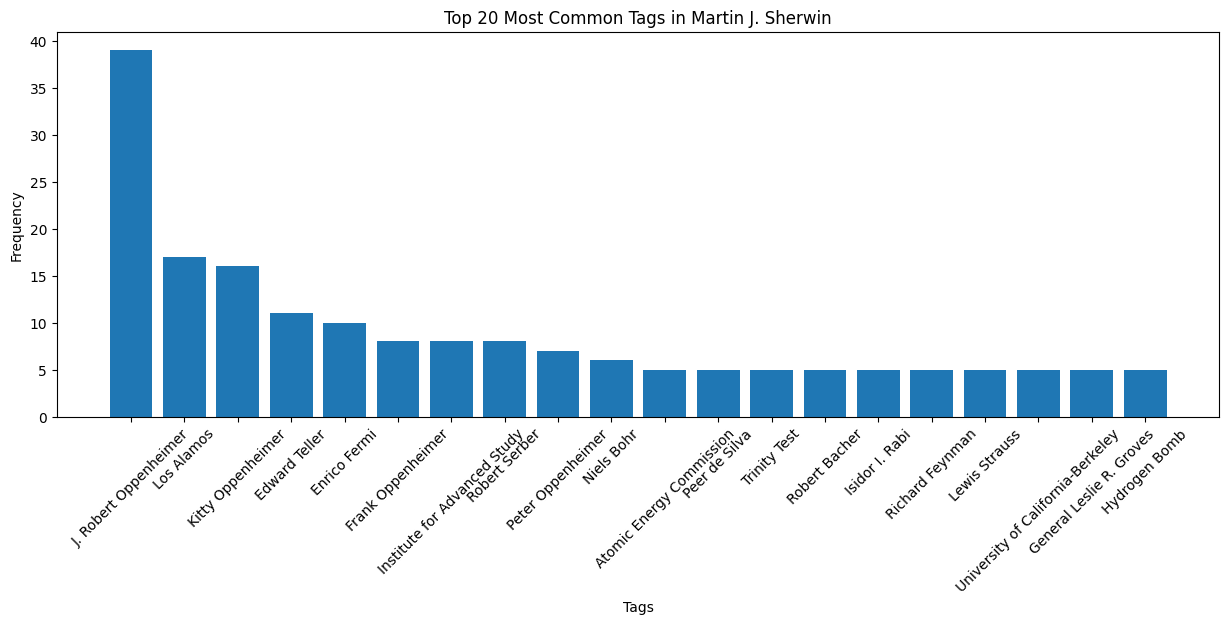

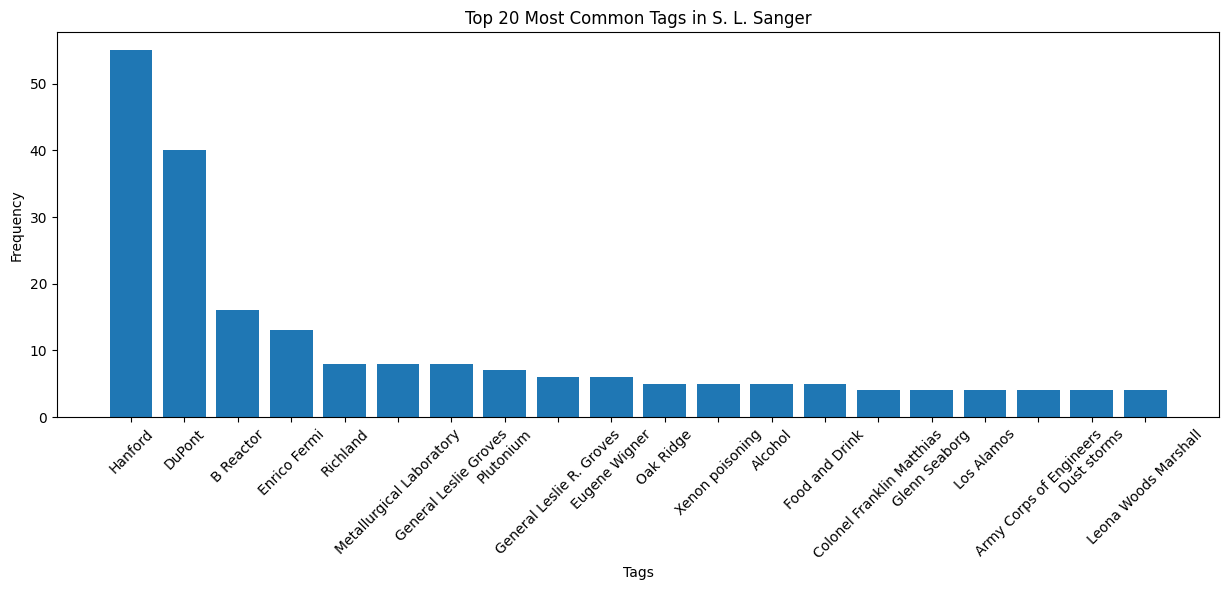

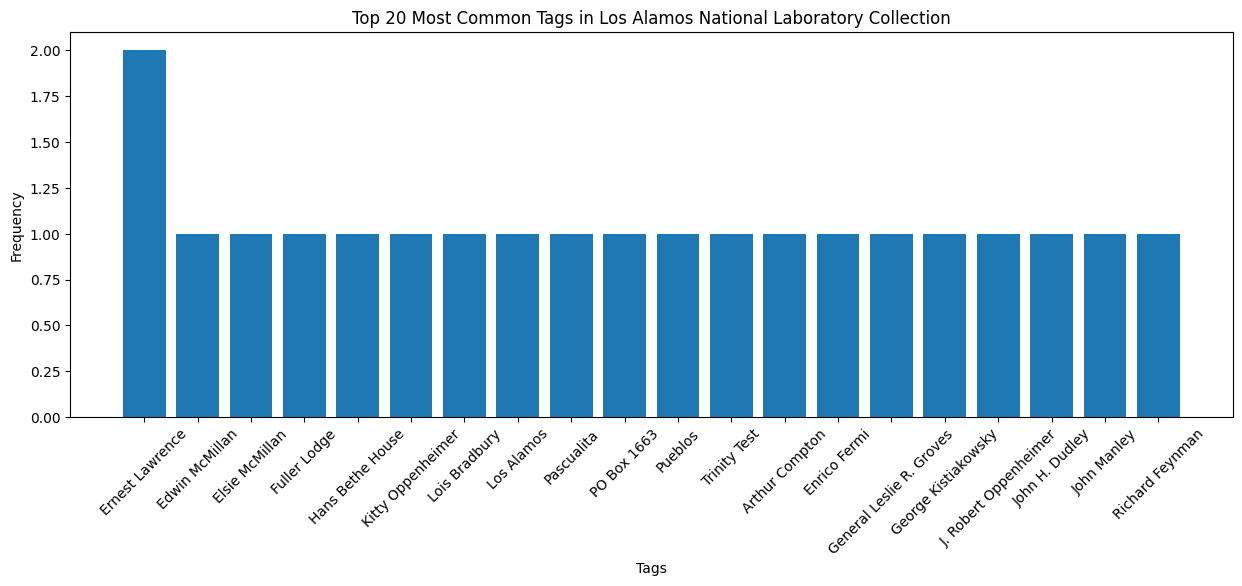

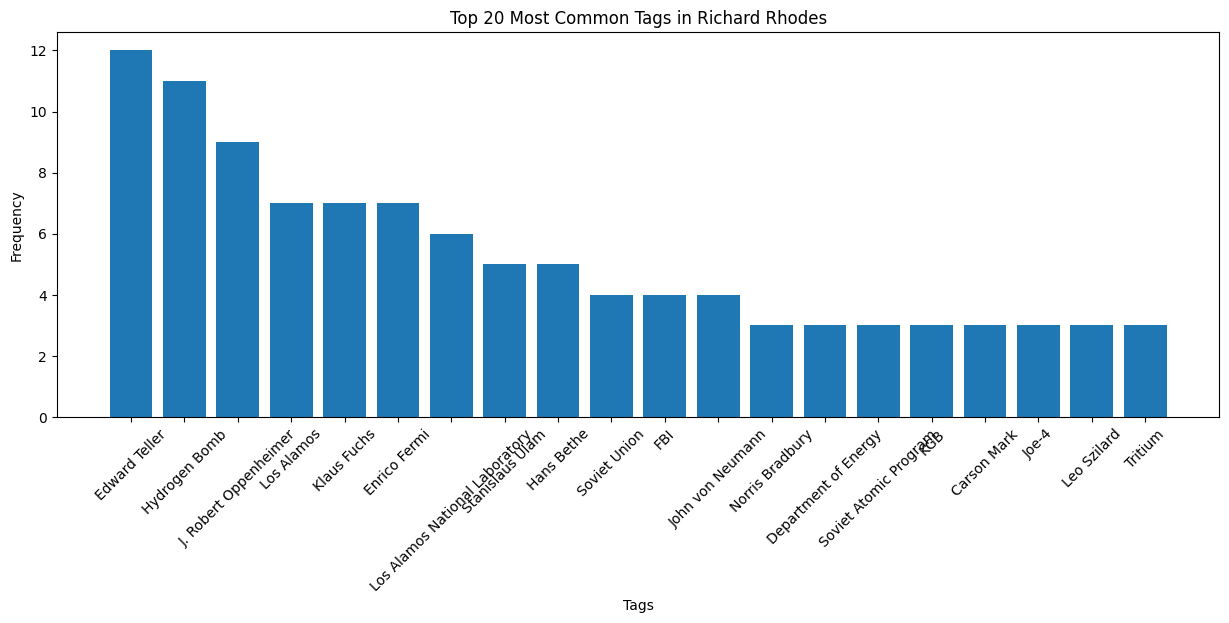

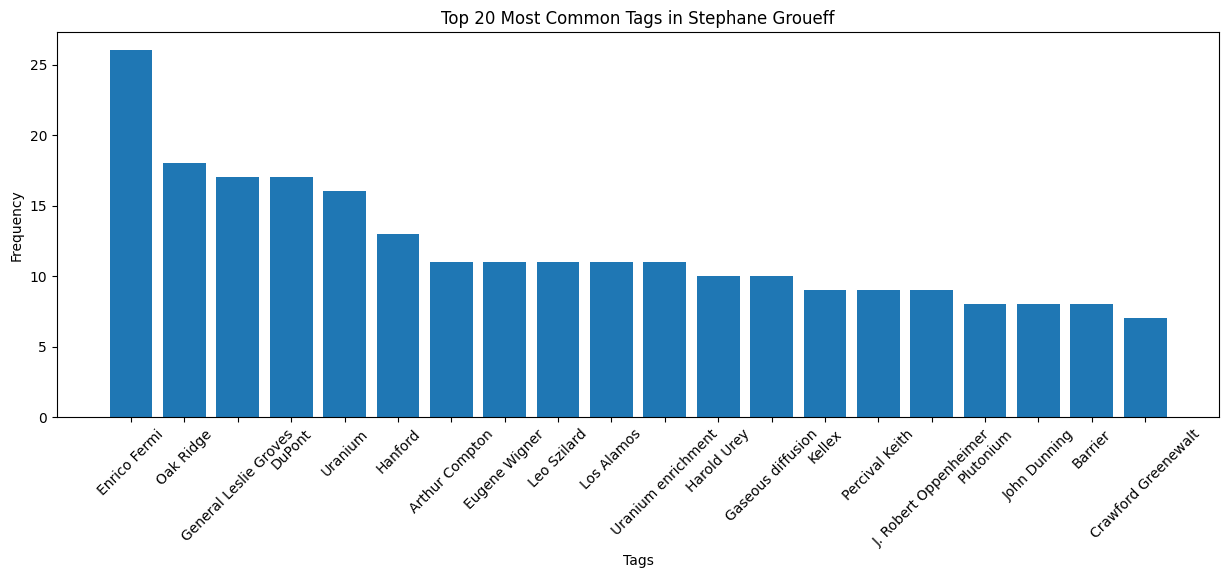

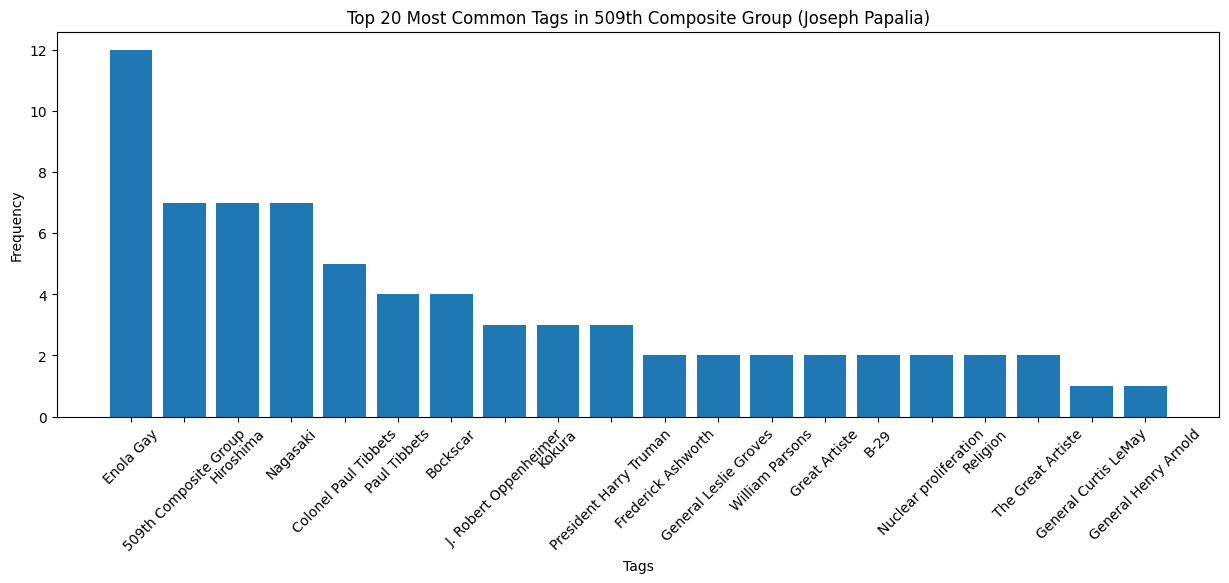

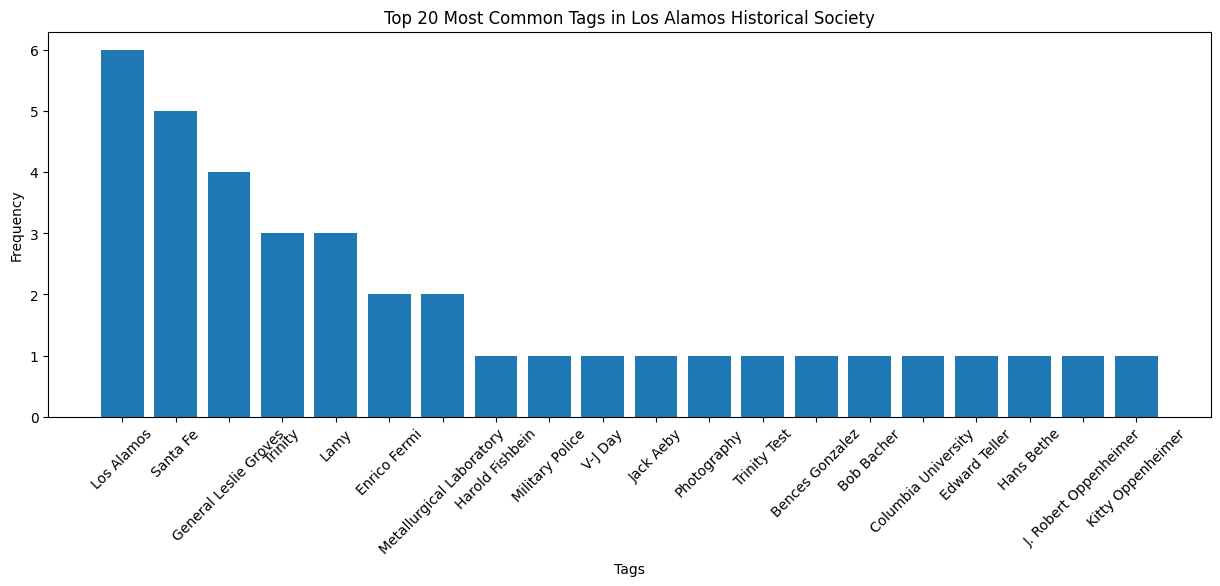

In [11]:
# Initialize a dictionary to store tags for each collection
collection_tags = {}

# Iterate through the DataFrame and accumulate tags for each collection
for _, row in df.iterrows():
    for collection in row["collections"]:
        if collection not in collection_tags:
            collection_tags[collection] = []
        collection_tags[collection].extend(row["tags"])

# Create a bar plot for each collection showing the frequencies of the 5 most common tags
for collection, tags in collection_tags.items():
    plot_most_common_tags(collection, tags, n=20)

tags
J. Robert Oppenheimer    144
Enrico Fermi             123
Los Alamos               116
Hanford                  108
DuPont                    92
                        ... 
Armenia                    1
Robert Oppenheimer         1
Richard Hamming            1
Rosalie Holtsberg          1
Farrington Daniels         1
Name: count, Length: 2042, dtype: int64
1.0
1409


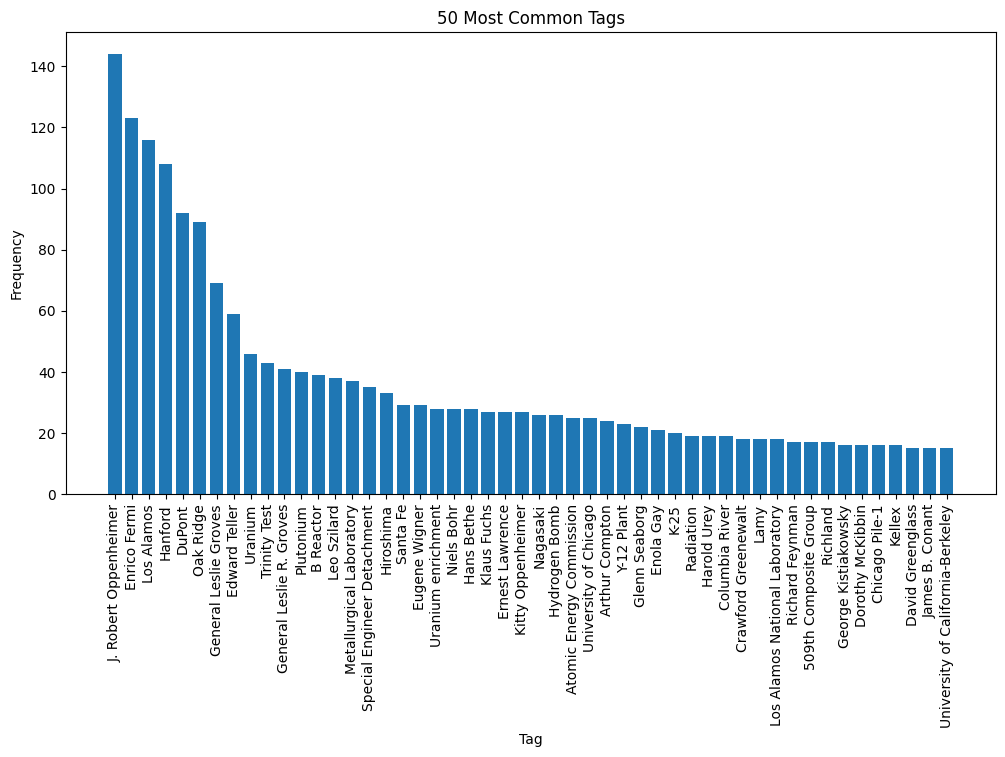

In [13]:
# Use explode() to create a new DataFrame with one row for each city
tags_df = df.explode('tags')

# Use value_counts() to count the frequency of each city
counts = tags_df['tags'].value_counts()
print(counts)

print(np.median(counts))
less_than_2 = (counts < 2).sum()
print(less_than_2)

# Use value_counts() to count the frequency of each tag and take the top 100
top_tags = tags_df['tags'].value_counts().head(50)

# Plot a bar chart of the top 100 tags
plt.figure(figsize=(12, 6))
plt.bar(top_tags.index, top_tags.values)
plt.xticks(rotation=90)
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.title("50 Most Common Tags")
plt.show()

In [15]:
# Use explode() to create a new DataFrame with one row for each city
subjects_df = df.explode('subjects')

# Use value_counts() to count the frequency of each city
counts = subjects_df['subjects'].value_counts()
print(counts)
print(len(counts))

subjects
Security & Secrecy                                       350
Innovations                                              279
Scientific Discoveries                                   230
Military-Civilian Relations                              197
Working Conditions                                       196
Reflections on the Bombings of Hiroshima and Nagasaki    188
Life in the Secret Cities                                184
Safety                                                   173
Housing                                                  162
Race for the Atomic Bomb                                 157
Social Life                                              154
Corporate Involvement in the Manhattan Project           150
Women                                                    127
University Involvement in the Manhattan Project          127
Civilian Life                                            124
Cold War                                                 120
Transportation 